In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from typing import Tuple
from glob import glob

In [33]:
def unzip(x):
    for a,b,c,d in x:
        return [a], [b], [c], [d]
        
class MetricHolder(object):
    def __init__(self, metric_name):
        self.metric_name = metric_name
        self.x = []
        self.avg = []
        self.high = []
        self.low = []
    def add(self, arg:Tuple):
        (epoch_n, avg, high, low) = arg
        self.x.append(epoch_n)
        self.avg.append(avg)
        self.high.append(high)
        self.low.append(low)
    def __call__(self):
        asc_order = sorted(zip(self.x, self.avg, self.high, self.low), key=lambda x: x[0])
        xs = []
        avgs = []
        highs = []
        lows = []
        for x, avg, high, low in asc_order:
            xs.append(x)
            avgs.append(avg)
            highs.append(high)
            lows.append(low)
        return xs, avgs, highs, lows

In [34]:
metrics = ["accuracy", "f1_score", "precision", "recall"]
class Graphable(object):
    def __init__(self, path, *, metrics=metrics):    
        self.metrics = {metric : MetricHolder(metric) for metric in metrics}
        self.path = path
    def append(self, metric_name, *, values):
        self.metrics[metric_name].add(values)
    def get(self, metric_name):
        return self.metrics[metric_name]()

In [35]:
def fold_variants(fold_no):
    dir = "./logs"
    variants = {
        "MDN Validation" : Graphable(f"{dir}/MDN_validation_*fold-{fold_no}.csv"),
        "MDN Train" : Graphable(f"{dir}/MDN_train_*fold-{fold_no}.csv"),
        
        "PRN Validation" : Graphable(f"{dir}/PRN_validation_*fold-{fold_no}.csv"),
        "PRN Train" : Graphable(f"{dir}/PRN_train_*fold-{fold_no}.csv")
    }
    return variants

In [36]:
def get_values(variants, metrics=metrics):
    for key, variant in variants.items():
        for file in glob(variant.path):
            df = pd.read_csv(file)
            for metric in metrics:
                x = int(file.split("_")[-2].split("-")[-1])
                avg = df[metric].mean()
                high = df[metric].max()
                low = df[metric].min()
                variant.append(metric, values=(x,avg,high,low))
                if key == "PRN Validation" and metric == "accuracy":
                    print(key,metric,x,avg,high,low)
    return variants

In [52]:
def plot_variant(graphable, *, metric, key):
    x, avg, high, low = graphable.get(metric)
    print(x,avg,high,low)
    if key == "PRN Train":
        plt.plot(x, avg, color='#9839B1', label=key)
        plt.fill_between(x, high, low, alpha=0.2, color='#15DB9D')
    elif key == "PRN Validation":
        plt.plot(x, avg, color='#C27CD5', label=key)
        plt.fill_between(x, high, low, alpha=0.2, color='#F18774')
    else:
        return
    plt.grid(True, color='white', linestyle='--', linewidth=1, alpha=0.5)

PRN Validation accuracy 148 0.7725465804811508 0.805908203125 0.716552734375
PRN Validation accuracy 19 0.005634610615079362 0.008544921875 0.00390625
PRN Validation accuracy 180 0.7580244760664682 0.7967529296875 0.6922607421875
PRN Validation accuracy 84 0.7620558965773809 0.79296875 0.7216796875
PRN Validation accuracy 163 0.7618307446676587 0.7962646484375 0.6875
PRN Validation accuracy 154 0.7676513671875 0.8023681640625 0.70068359375
PRN Validation accuracy 50 0.15311996217757937 0.1729166666666666 0.145751953125
PRN Validation accuracy 67 0.5203539651537699 0.535400390625 0.4981689453125
PRN Validation accuracy 3 0.006247674851190476 0.0113525390625 0.0045166015625
PRN Validation accuracy 101 0.7856414310515873 0.822998046875 0.7294921875
PRN Validation accuracy 136 0.7764020647321429 0.814697265625 0.7127685546875
PRN Validation accuracy 32 0.018187313988095238 0.021484375 0.0152587890625
PRN Validation accuracy 98 0.7837173704117064 0.820068359375 0.7264404296875
PRN Validatio

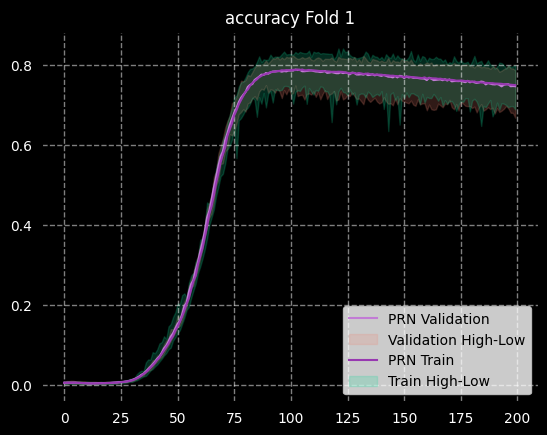

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.8258060241679823, 0.9182021635096698, 0.9537797537174016, 0.9693905917838925, 0.9750856334018329, 0.975630

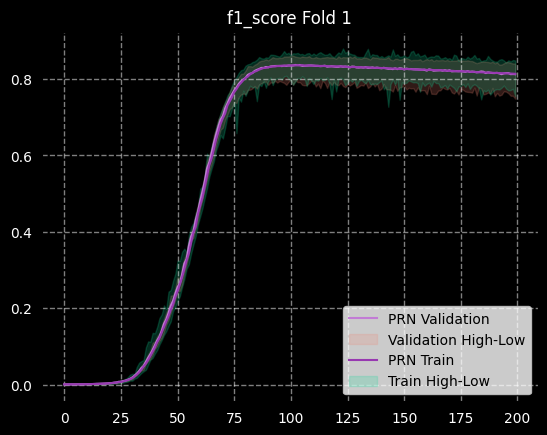

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.9909022954248247, 0.991401754142273, 0.991593898495748, 0.9916108740227563, 0.9916640991965929, 0.99172402

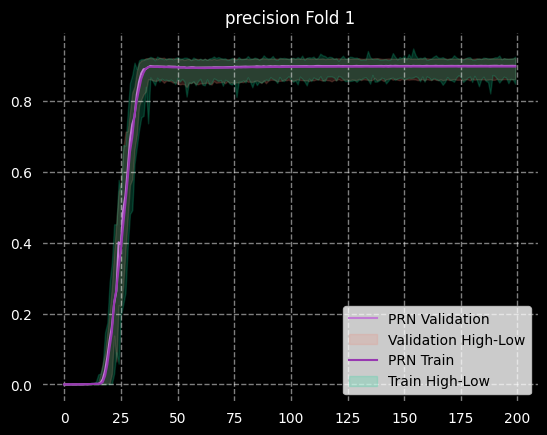

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.7139435298859127, 0.8567037915426587, 0.9193308996775794, 0.9484293619791667, 0.9592633928571429, 0.960257

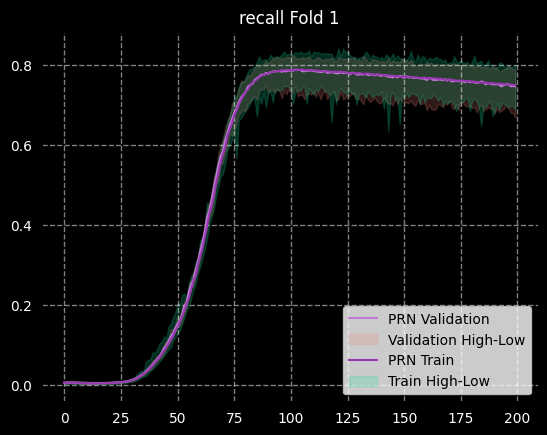

<Figure size 640x480 with 0 Axes>

Fold 1 done
PRN Validation accuracy 89 0.7768616691468255 0.8050537109375 0.7457275390625
PRN Validation accuracy 14 0.004752216641865076 0.007080078125 0.002685546875
PRN Validation accuracy 23 0.006552269345238095 0.0089111328125 0.00439453125
PRN Validation accuracy 127 0.7823796347966271 0.8211669921875 0.7503662109375
PRN Validation accuracy 110 0.7886924138144842 0.822021484375 0.76123046875
PRN Validation accuracy 76 0.6871268136160714 0.7083740234375 0.6572265625
PRN Validation accuracy 41 0.06778932601686508 0.0760416666666666 0.0621337890625
PRN Validation accuracy 145 0.772164093501984 0.8160400390625 0.7437744140625
PRN Validation accuracy 172 0.7646290612599206 0.810791015625 0.7236328125
PRN Validation accuracy 95 0.7837503100198413 0.8270263671875 0.751708984375
PRN Validation accuracy 191 0.758697994171627 0.798095703125 0.7186279296875
PRN Validation accuracy 159 0.7719331287202381 0.811279296875 0.7376708984375
PRN Validation accuracy 148 0.7735049293154762 0.81579589

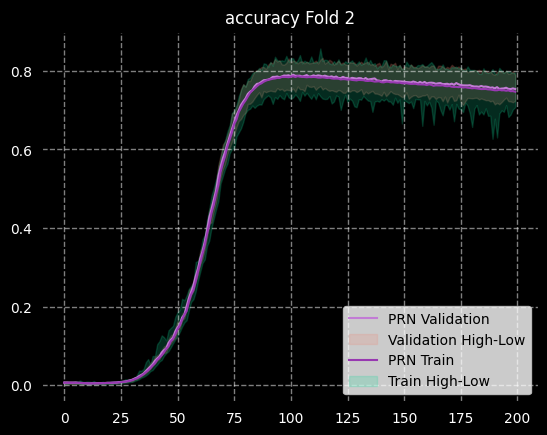

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.825255036324499, 0.9168665720061178, 0.9526517054036496, 0.9693625121303494, 0.9754700850340582, 0.9761349

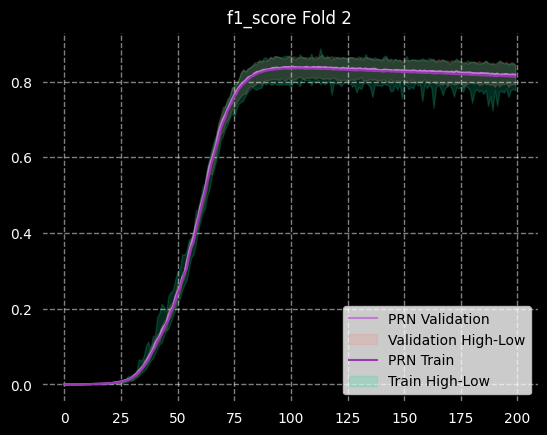

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.9908942409924099, 0.9914865934600433, 0.9914731585553714, 0.9916266259692964, 0.9916995772648425, 0.992018

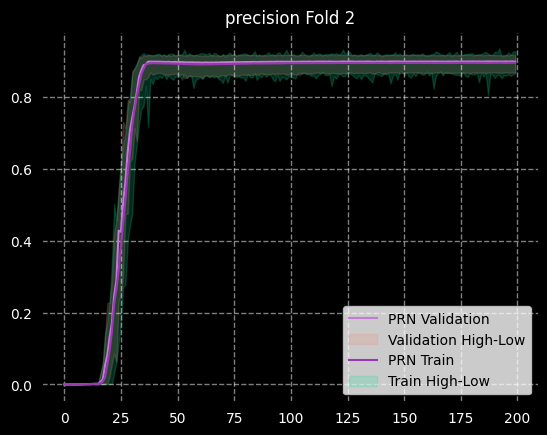

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.713092525421627, 0.8543433779761904, 0.9173510354662698, 0.9483487568204365, 0.9599609375, 0.9611142113095

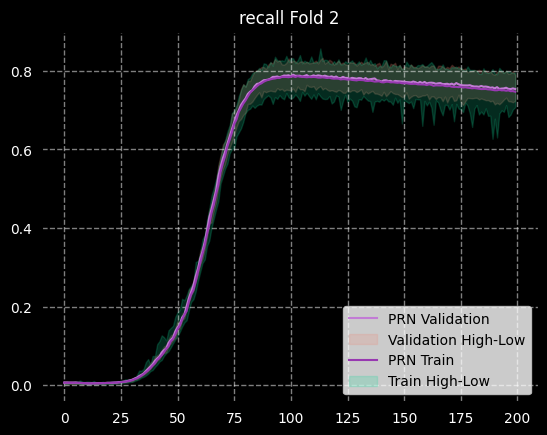

<Figure size 640x480 with 0 Axes>

Fold 2 done
PRN Validation accuracy 159 0.6236173115079365 0.6651611328125 0.586181640625
PRN Validation accuracy 191 0.586334712921627 0.6158447265625 0.5478515625
PRN Validation accuracy 95 0.681314716641865 0.7078857421875 0.6517333984375
PRN Validation accuracy 172 0.611745101686508 0.63720703125 0.5799560546875
PRN Validation accuracy 145 0.6429327101934523 0.6705322265625 0.5986328125
PRN Validation accuracy 41 0.0067840091765873 0.009521484375 0.0048828125
PRN Validation accuracy 76 0.6976930648561508 0.729736328125 0.6580810546875
PRN Validation accuracy 110 0.670698474702381 0.7052001953125 0.6282958984375
PRN Validation accuracy 127 0.6583651103670635 0.691162109375 0.6199951171875
PRN Validation accuracy 23 0.008053152901785715 0.010009765625 0.005859375
PRN Validation accuracy 14 0.005817134796626981 0.0072916666666666 0.003662109375
PRN Validation accuracy 89 0.6898235987103175 0.7362060546875 0.6436767578125
PRN Validation accuracy 98 0.6770829458085318 0.7095947265625 0.

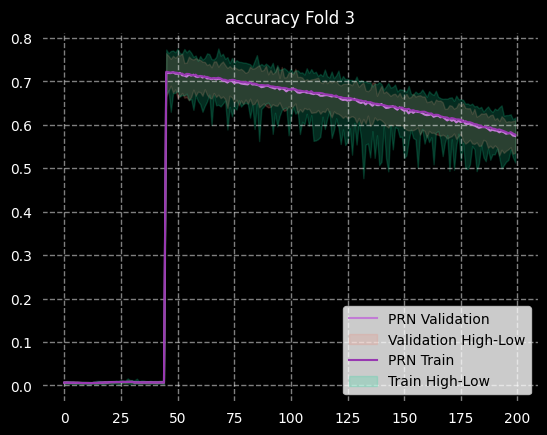

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.962670473234048, 0.97475658653984, 0.8570293376074423, 0.6256794021065746, 0.515404187734165, 0.4387751250

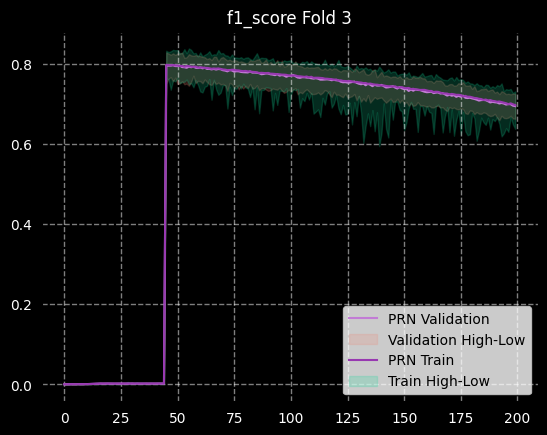

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.9904116373509169, 0.9907816630743799, 0.9965289272367954, 0.9963732587971857, 0.9964081234342995, 0.996471

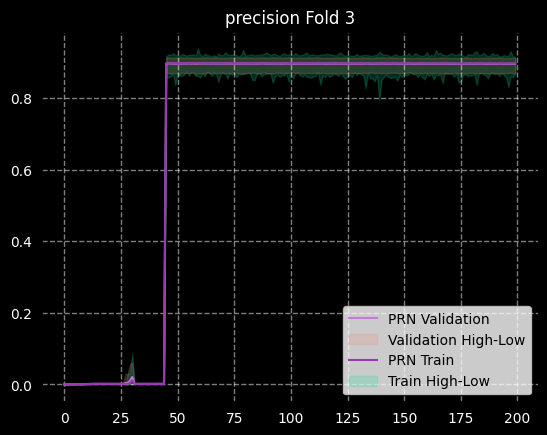

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.9368563213045634, 0.9595435732886906, 0.7578861297123016, 0.4724578373015873, 0.36557772197420635, 0.29911

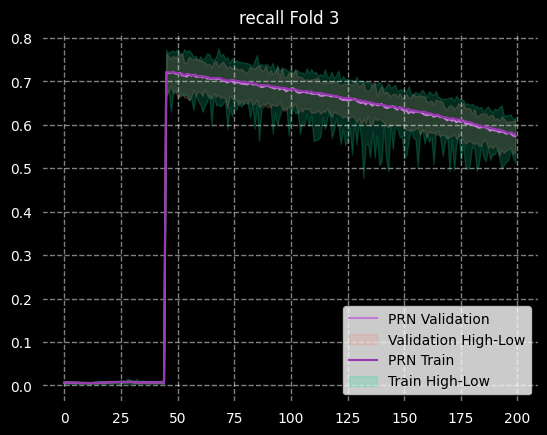

<Figure size 640x480 with 0 Axes>

Fold 3 done
PRN Validation accuracy 81 0.43396112351190474 0.4630126953125 0.38515625
PRN Validation accuracy 185 0.2255700489831349 0.250732421875 0.1841145833333333
PRN Validation accuracy 49 0.49382789248511905 0.5211181640625 0.4359375
PRN Validation accuracy 118 0.355750480530754 0.3819580078125 0.2997395833333333
PRN Validation accuracy 199 0.1905579582093254 0.2178955078125 0.1544270833333333
PRN Validation accuracy 55 0.48233468191964285 0.505615234375 0.44140625
PRN Validation accuracy 62 0.46212100074404766 0.4853515625 0.4015625
PRN Validation accuracy 166 0.2552916511656746 0.2835693359375 0.1979166666666666
PRN Validation accuracy 151 0.2903238932291667 0.312744140625 0.23046875
PRN Validation accuracy 37 0.5141462053571428 0.5430908203125 0.46796875
PRN Validation accuracy 6 0.5612649584573413 0.584228515625 0.5166666666666667
PRN Validation accuracy 104 0.3834685794890873 0.403564453125 0.3356770833333333
PRN Validation accuracy 133 0.320594230530754 0.3458251953125 0.27

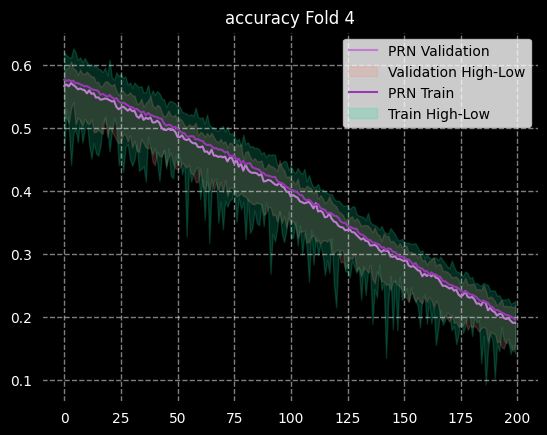

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.01553507040577623, 0.016680559684073823, 0.016654714666511226, 0.016114746000109984, 0.01574055203736712, 

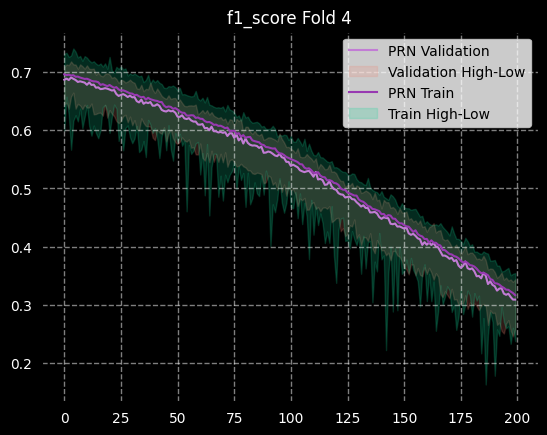

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.798911492856415, 0.8040211681793846, 0.8318612131669787, 0.8099893126712694, 0.7965415642934796, 0.8158957

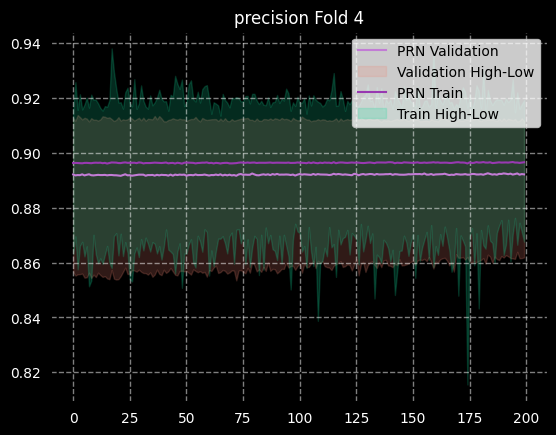

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.011442444816468254, 0.012034970238095239, 0.011994280133928573, 0.011714099702380952, 0.011533513144841266

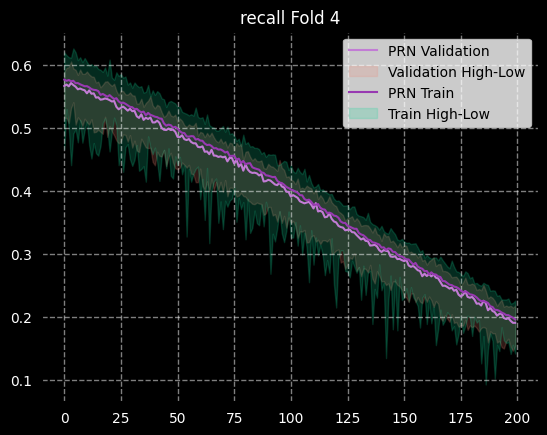

<Figure size 640x480 with 0 Axes>

Fold 4 done
PRN Validation accuracy 133 0.05403529575892857 0.0673828125 0.03671875
PRN Validation accuracy 104 0.06896817646329365 0.0855712890625 0.0346354166666666
PRN Validation accuracy 6 0.1789236886160714 0.2000732421875 0.13203125
PRN Validation accuracy 37 0.12732321118551587 0.1494140625 0.0950520833333333
PRN Validation accuracy 151 0.04675680493551587 0.062255859375 0.0247395833333333
PRN Validation accuracy 166 0.043484545510912694 0.0552978515625 0.02880859375
PRN Validation accuracy 62 0.10017167348710318 0.1187744140625 0.0658854166666666
PRN Validation accuracy 55 0.1040345207093254 0.125 0.0708333333333333
PRN Validation accuracy 199 0.03728376116071429 0.0482177734375 0.0234375
PRN Validation accuracy 118 0.059864056299603174 0.0789794921875 0.0361979166666666
PRN Validation accuracy 49 0.11537543402777778 0.137451171875 0.0747395833333333
PRN Validation accuracy 185 0.03782745845734127 0.0467529296875 0.0244791666666666
PRN Validation accuracy 81 0.086181640625 0.10

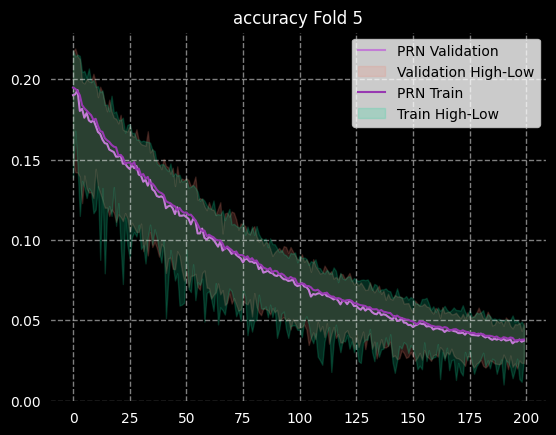

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.005501978210463262, 0.005458090506787462, 0.005624032988014195, 0.005788135457213824, 0.005563322573618133

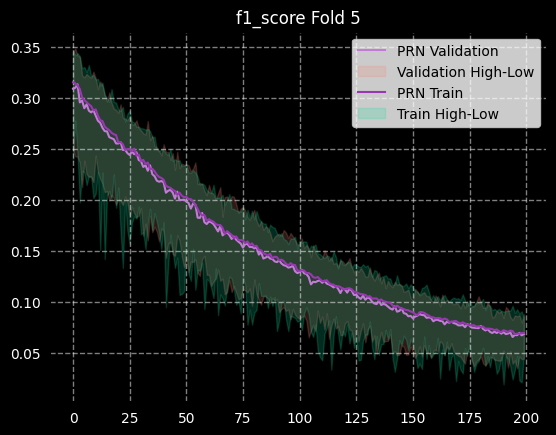

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.3885027689066495, 0.38573299287332724, 0.3651718432150783, 0.4084415354470265, 0.3884014125370846, 0.39918

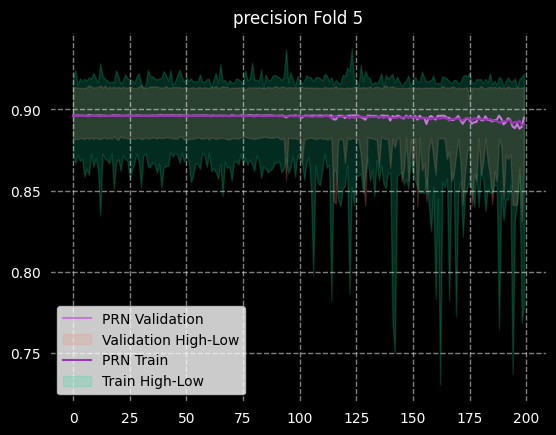

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.006065925719246029, 0.006007796999007934, 0.006108165922619048, 0.006215122767857143, 0.006083751860119047

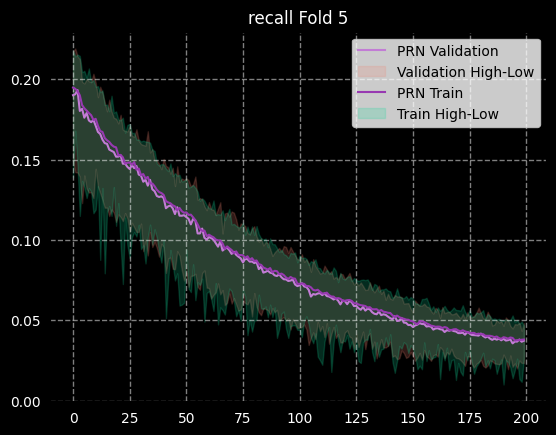

<Figure size 640x480 with 0 Axes>

Fold 5 done
PRN Validation accuracy 90 0.030545867435515874 0.037353515625 0.0192708333333333
PRN Validation accuracy 194 0.020368691096230157 0.0235595703125 0.015625
PRN Validation accuracy 58 0.03305702814980159 0.04052734375 0.0192708333333333
PRN Validation accuracy 109 0.028777591765873013 0.0360107421875 0.0208333333333333
PRN Validation accuracy 188 0.01993427579365079 0.02294921875 0.0143229166666666
PRN Validation accuracy 44 0.03367358010912698 0.0391845703125 0.0245361328125
PRN Validation accuracy 73 0.03041410900297619 0.03515625 0.021875
PRN Validation accuracy 177 0.020631432911706347 0.0240478515625 0.0147705078125
PRN Validation accuracy 140 0.025540209573412694 0.0291748046875 0.0205078125
PRN Validation accuracy 26 0.035801478794642856 0.042724609375 0.0223388671875
PRN Validation accuracy 11 0.03574490017361111 0.0419921875 0.0200520833333333
PRN Validation accuracy 115 0.02816840277777778 0.0333251953125 0.0192708333333333
PRN Validation accuracy 122 0.02789752294

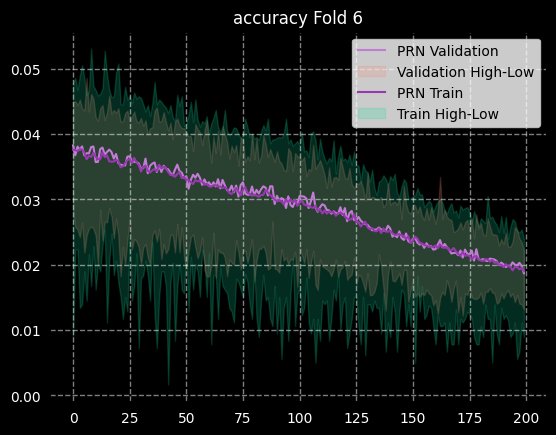

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.008511971954566567, 0.008060854372902966, 0.008409387274826083, 0.007646755834771444, 0.00894502296846939,

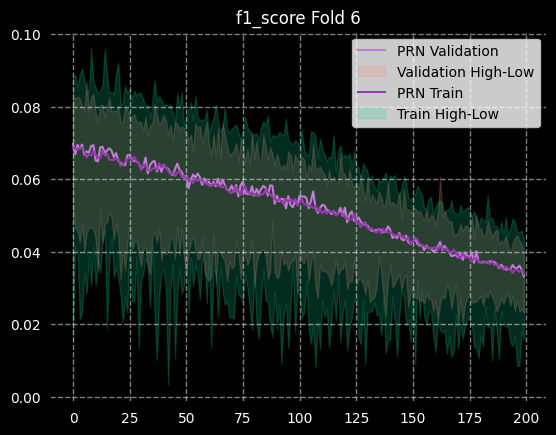

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.5656529260432026, 0.5433608107140543, 0.5690957148870728, 0.517576890948372, 0.6005205907525225, 0.5338860

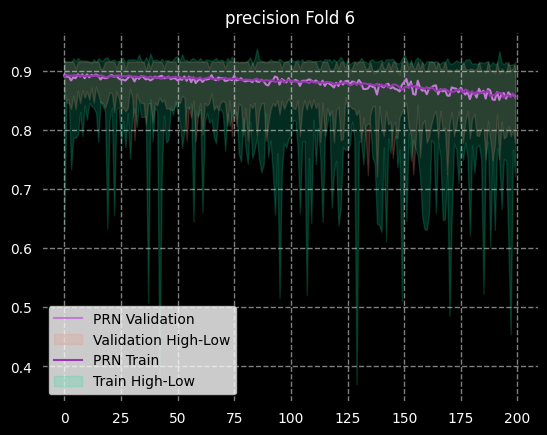

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.007103717137896824, 0.006887865823412695, 0.007044813368055552, 0.006660001240079362, 0.007331194196428571

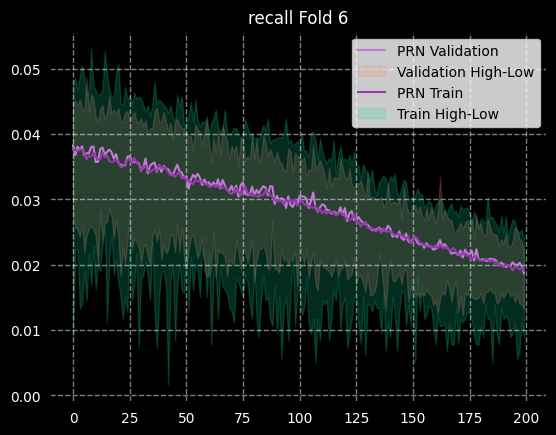

<Figure size 640x480 with 0 Axes>

Fold 6 done
PRN Validation accuracy 122 0.00856352306547619 0.0113525390625 0.0045166015625
PRN Validation accuracy 115 0.008969649057539681 0.0118408203125 0.005615234375
PRN Validation accuracy 11 0.017387462797619047 0.0240478515625 0.01015625
PRN Validation accuracy 26 0.015895492311507935 0.0196533203125 0.0088541666666666
PRN Validation accuracy 140 0.007402111235119048 0.0103759765625 0.0046875
PRN Validation accuracy 177 0.005883401537698409 0.0081787109375 0.0040283203125
PRN Validation accuracy 73 0.011858646453373015 0.0152587890625 0.0059895833333333
PRN Validation accuracy 44 0.013873387896825396 0.0196533203125 0.0086669921875
PRN Validation accuracy 188 0.0053730313740079335 0.0069580078125 0.0026041666666666
PRN Validation accuracy 109 0.009619915674603172 0.0115966796875 0.0057291666666666
PRN Validation accuracy 58 0.012389167906746027 0.015380859375 0.0065104166666666
PRN Validation accuracy 194 0.005374193948412695 0.006591796875 0.004150390625
PRN Validation accura

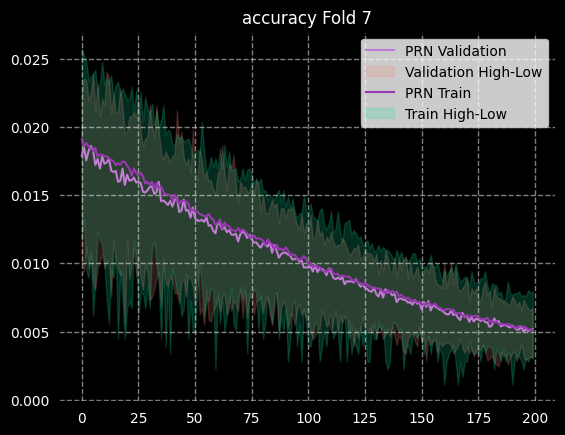

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.0074206328597013985, 0.00762990523487259, 0.006824466820612428, 0.007067376901322233, 0.007716002701200153

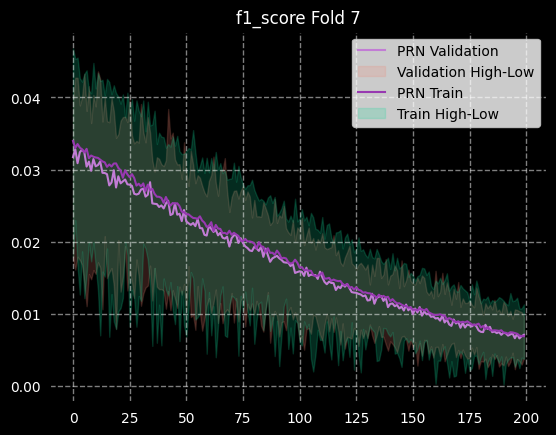

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.44801069233445806, 0.45469362164499283, 0.41761390596454023, 0.44621937272458456, 0.4809221143970024, 0.43

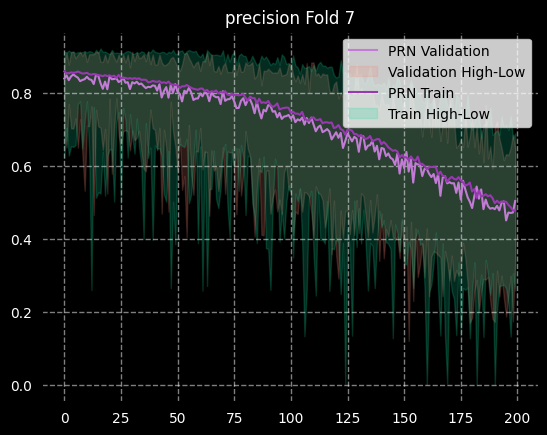

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.006754944816468252, 0.006868102058531743, 0.006486002604166667, 0.006623573908730158, 0.006925843253968253

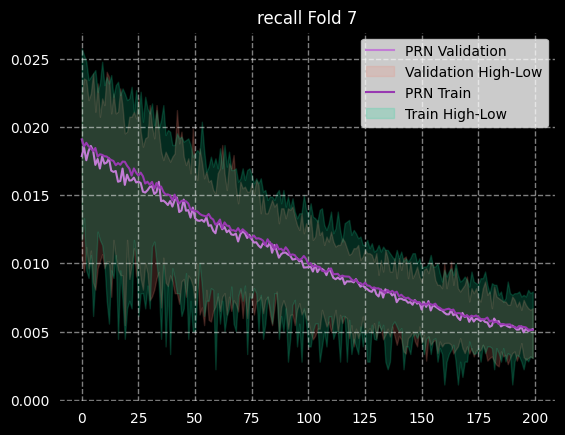

<Figure size 640x480 with 0 Axes>

Fold 7 done
PRN Validation accuracy 197 0.0020224919394841237 0.002685546875 0.0009765625
PRN Validation accuracy 93 0.002651832217261905 0.00390625 0.001708984375
PRN Validation accuracy 39 0.003877573164682538 0.0052490234375 0.0020833333333333
PRN Validation accuracy 8 0.004648747519841266 0.00634765625 0.001708984375
PRN Validation accuracy 168 0.002215091765873014 0.0029296875 0.0009765625
PRN Validation accuracy 116 0.0024228050595238096 0.0037841796875 0.00146484375
PRN Validation accuracy 121 0.002562313988095238 0.0032958984375 0.0015625
PRN Validation accuracy 25 0.004132176959325396 0.0059814453125 0.002197265625
PRN Validation accuracy 12 0.004212394593253966 0.00537109375 0.0030517578125
PRN Validation accuracy 174 0.002115497891865076 0.0032958984375 0.0010986328125
PRN Validation accuracy 143 0.002318173363095238 0.0040283203125 0.001220703125
PRN Validation accuracy 47 0.0034082806299603145 0.0052490234375 0.0023193359375
PRN Validation accuracy 70 0.0032482328869047616

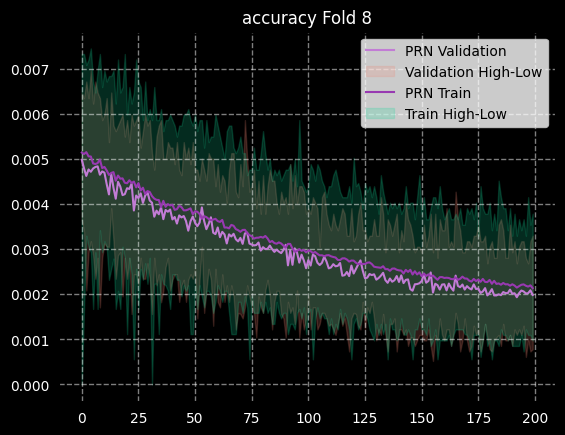

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.004303867700443843, 0.004418164656921566, 0.004322896515380566, 0.004562394655944657, 0.004551449822501409

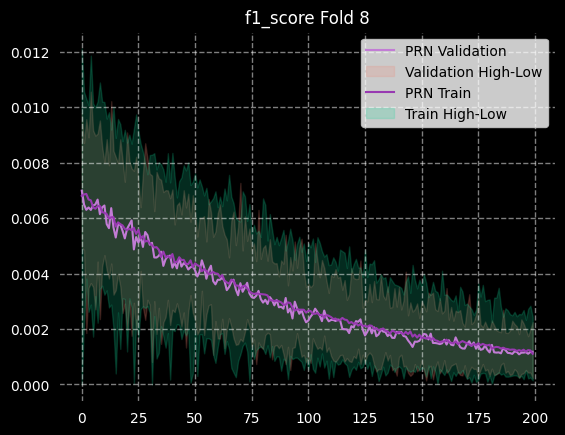

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.13020589580594077, 0.13307548571282823, 0.1333864930223099, 0.1614305048157774, 0.15139065823290765, 0.161

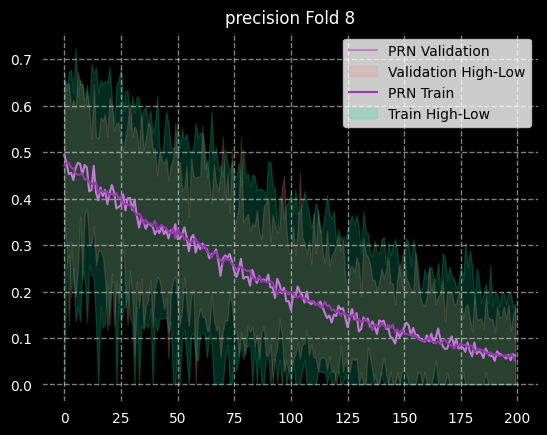

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.005313740079365076, 0.005418371775793647, 0.0053958953373015855, 0.005535404265873014, 0.00545479910714285

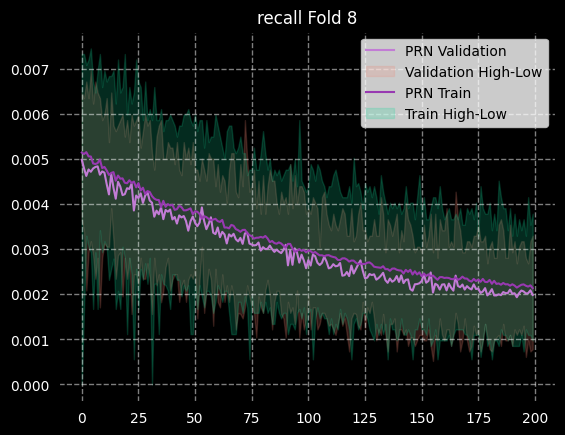

<Figure size 640x480 with 0 Axes>

Fold 8 done
PRN Validation accuracy 70 0.0018081907242063476 0.0028076171875 0.0009765625
PRN Validation accuracy 47 0.0019333612351190477 0.003125 0.0010986328125
PRN Validation accuracy 143 0.0018872457837301572 0.0032958984375 0.0009765625
PRN Validation accuracy 174 0.0018721323164682523 0.0032958984375 0.0010986328125
PRN Validation accuracy 12 0.0020968967013888858 0.0033854166666666 0.0010986328125
PRN Validation accuracy 25 0.0018512059771825383 0.0028645833333333 0.000732421875
PRN Validation accuracy 121 0.0019275483630952382 0.003125 0.001220703125
PRN Validation accuracy 116 0.0019252232142857142 0.003173828125 0.0008544921875
PRN Validation accuracy 168 0.0016876705109126952 0.0026041666666666 0.000732421875
PRN Validation accuracy 8 0.0019573877728174573 0.0033854166666666 0.0010986328125
PRN Validation accuracy 39 0.002036442832341267 0.002685546875 0.001220703125
PRN Validation accuracy 93 0.0019077845982142857 0.002685546875 0.0010986328125
PRN Validation accuracy 197 

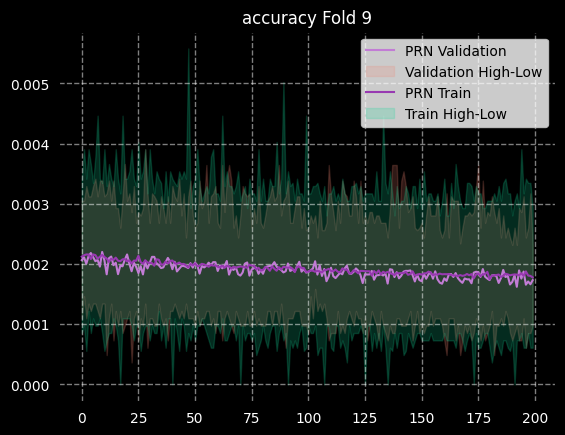

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.002797012106254519, 0.002746077981793743, 0.0027600031483286094, 0.002730260411832771, 0.00291974678332600

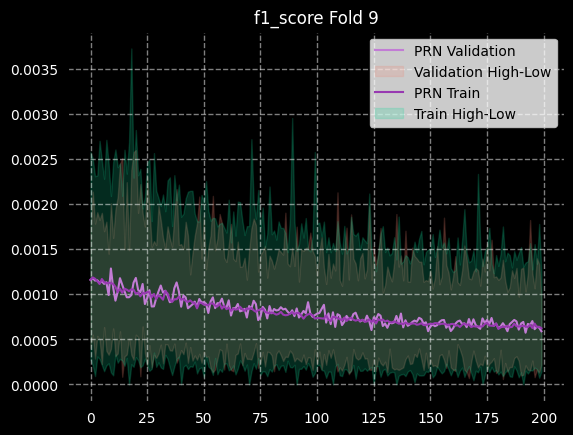

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.043929374786834105, 0.03170363943657622, 0.03315062925498965, 0.028759387459970056, 0.05846720395368011, 0

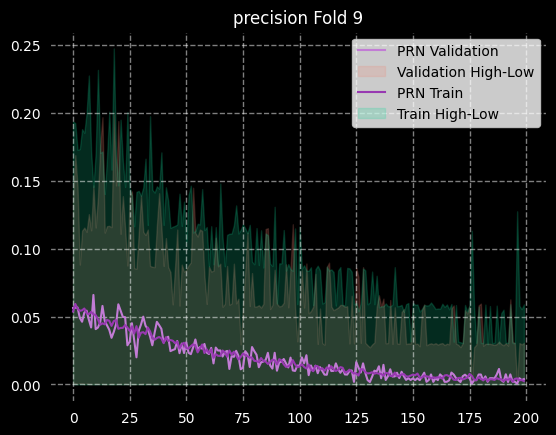

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.0040531218998015855, 0.004074823288690476, 0.004039946056547619, 0.003981817336309524, 0.00416279141865079

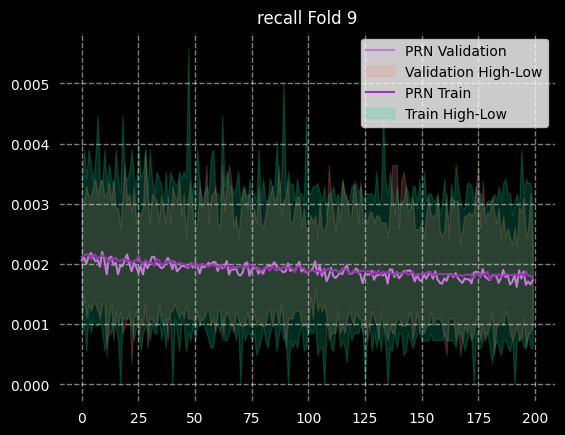

<Figure size 640x480 with 0 Axes>

Fold 9 done
PRN Validation accuracy 5 0.0019062344990079332 0.0028076171875 0.001220703125
PRN Validation accuracy 74 0.001737661210317457 0.002685546875 0.0008544921875
PRN Validation accuracy 180 0.001827179439484124 0.002685546875 0.0009765625
PRN Validation accuracy 89 0.0018422929067460285 0.0029296875 0.0010986328125
PRN Validation accuracy 123 0.001721772693452381 0.0028076171875 0.000732421875
PRN Validation accuracy 153 0.0017748635912698382 0.0030517578125 0.000732421875
PRN Validation accuracy 46 0.0019849020337301573 0.0030517578125 0.0009765625
PRN Validation accuracy 36 0.0019011966765872998 0.0035400390625 0.001220703125
PRN Validation accuracy 95 0.0017268105158730143 0.0025634765625 0.0006103515625
PRN Validation accuracy 68 0.001795014880952381 0.0030517578125 0.0008544921875
PRN Validation accuracy 161 0.0018570188492063478 0.0029296875 0.0010986328125
PRN Validation accuracy 18 0.001878720238095238 0.002685546875 0.001220703125
PRN Validation accuracy 111 0.00173184

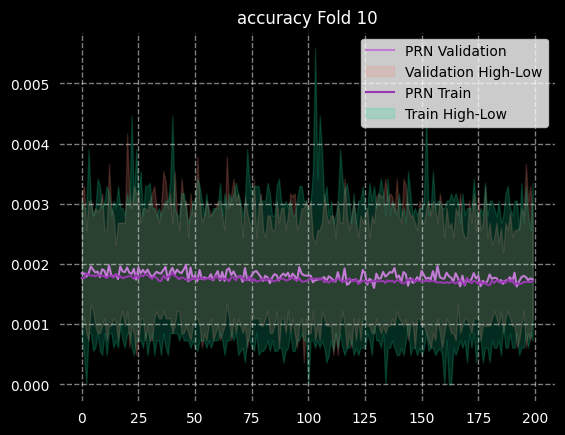

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.0027891361975586094, 0.002740806633352905, 0.0027620750148517003, 0.002787016776329367, 0.0027562600436275

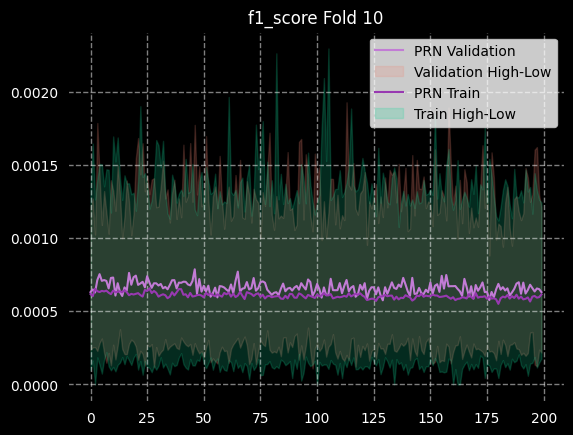

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.011137427385230157, 0.006661432713458638, 0.0081573824743914, 0.009623066005479748, 0.01257534110763591, 0

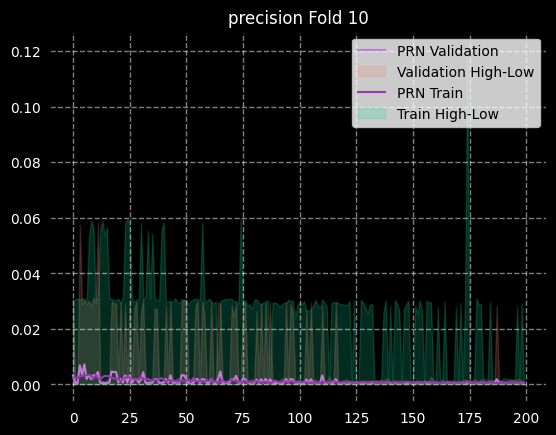

<Figure size 640x480 with 0 Axes>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.004167829241071429, 0.00415620349702381, 0.004127139136904762, 0.004132952008928571, 0.004138764880952381,

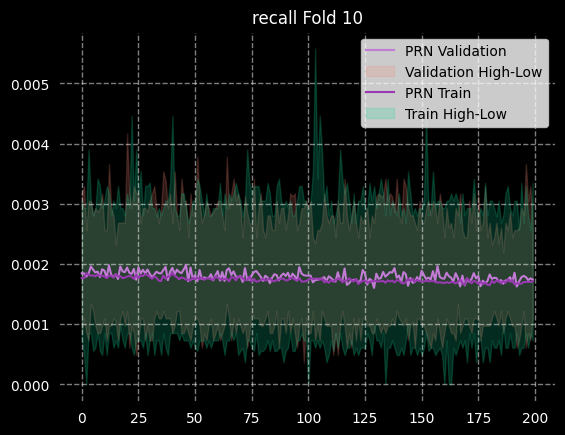

<Figure size 640x480 with 0 Axes>

Fold 10 done


In [53]:
folds = 10
for fold_no in range(1, folds+1):
    variants = fold_variants(fold_no)
    variants = get_values(variants)
    for metric in metrics:
        fig, ax = plt.subplots()
        ax.set_facecolor('#000000')
        fig.patch.set_facecolor('#000000')
        for key, variant in variants.items():
            plot_variant(variant, metric=metric, key=key)
        plt.title(f"{metric[0].upper() + metric[1:]} Fold {fold_no}", color='white')
        plt.legend(['PRN Validation', 'Validation High-Low','PRN Train', 'Train High-Low'])
        plt.xticks(color='white')
        plt.yticks(color='white')
        plt.show()
        plt.savefig(f"./graphs/{metric}_fold_{fold_no}.png")
        plt.pause(0.1)
        plt.close()
    print("Fold", fold_no, "done")

In [39]:
plot_variant(variants["PRN Validation"], metric="f1_score")

TypeError: plot_variant() missing 1 required keyword-only argument: 'key'

In [ ]:
#########
# WRONG #
#########
"""
# plotting accuracy with respect to epochs with error bars
plt.figure()
# change the dimensions of the graph
plt.figure(figsize=(10, 5))
plt.errorbar(np.arange(1, len(train_accuracy_avg)+1), train_accuracy_avg, yerr=train_accuracy_std, fmt='-o', color='skyblue', ecolor='pink', elinewidth=1, capsize=0.5, markersize=2, linewidth=0.5, label="Train")
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
"""

'\n# plotting accuracy with respect to epochs with error bars\nplt.figure()\n# change the dimensions of the graph\nplt.figure(figsize=(10, 5))\nplt.errorbar(np.arange(1, len(train_accuracy_avg)+1), train_accuracy_avg, yerr=train_accuracy_std, fmt=\'-o\', color=\'skyblue\', ecolor=\'pink\', elinewidth=1, capsize=0.5, markersize=2, linewidth=0.5, label="Train")\nplt.title("Accuracy vs Epochs")\nplt.xlabel("Epochs")\nplt.ylabel("Accuracy")\nplt.show()\n'

In [ ]:
"""
dir = "./logs"
files = os.listdir(dir)
for file in files:
    data = pd.read_csv(dir + "/" + file)
    accuracy_avg.append(np.mean(data["accuracy"].values))
    accuracy_std.append(np.std(data["accuracy"].values))

    f1_score_avg.append(np.mean(data["f1_score"].values))
    f1_score_std.append(np.std(data["f1_score"].values))
    
    precision_avg.append(np.mean(data["precision"].values))
    precision_std.append(np.std(data["precision"].values))
    
    recall_avg.append(np.mean(data["recall"].values))
    recall_std.append(np.std(data["recall"].values))
"""

'\ndir = "./logs"\nfiles = os.listdir(dir)\nfor file in files:\n    data = pd.read_csv(dir + "/" + file)\n    accuracy_avg.append(np.mean(data["accuracy"].values))\n    accuracy_std.append(np.std(data["accuracy"].values))\n\n    f1_score_avg.append(np.mean(data["f1_score"].values))\n    f1_score_std.append(np.std(data["f1_score"].values))\n    \n    precision_avg.append(np.mean(data["precision"].values))\n    precision_std.append(np.std(data["precision"].values))\n    \n    recall_avg.append(np.mean(data["recall"].values))\n    recall_std.append(np.std(data["recall"].values))\n'

In [ ]:
# print(len(files), len(accuracy_avg), len(f1_score_avg), len(precision_avg), len(recall_avg))

In [ ]:
"""
# plotting accuracy with respect to epochs with error bars
plt.figure()
plt.errorbar(np.arange(1, len(accuracy_avg)+1), accuracy_avg, yerr=accuracy_std, fmt='-o', color='skyblue', ecolor='pink', elinewidth=1, capsize=2)
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
"""

'\n# plotting accuracy with respect to epochs with error bars\nplt.figure()\nplt.errorbar(np.arange(1, len(accuracy_avg)+1), accuracy_avg, yerr=accuracy_std, fmt=\'-o\', color=\'skyblue\', ecolor=\'pink\', elinewidth=1, capsize=2)\nplt.title("Accuracy vs Epochs")\nplt.xlabel("Epochs")\nplt.ylabel("Accuracy")\nplt.show()\n'

In [ ]:
"""
# plotting accuracy with respect to epochs with error fill
plt.figure()
plt.plot(np.arange(1, len(accuracy_avg)+1), accuracy_avg, '-o', color='skyblue')
plt.fill_between(np.arange(1, len(accuracy_avg)+1), [avg - std for avg, std in zip(accuracy_avg, accuracy_std)], [avg + std for avg, std in zip(accuracy_avg, accuracy_std)], color='pink', alpha=0.4)
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
"""

'\n# plotting accuracy with respect to epochs with error fill\nplt.figure()\nplt.plot(np.arange(1, len(accuracy_avg)+1), accuracy_avg, \'-o\', color=\'skyblue\')\nplt.fill_between(np.arange(1, len(accuracy_avg)+1), [avg - std for avg, std in zip(accuracy_avg, accuracy_std)], [avg + std for avg, std in zip(accuracy_avg, accuracy_std)], color=\'pink\', alpha=0.4)\nplt.title("Accuracy vs Epochs")\nplt.xlabel("Epochs")\nplt.ylabel("Accuracy")\nplt.show()\n'